In [15]:
from pathlib import Path

DATA_DIR = Path.cwd().parent / "data"

DATA_DIR

PosixPath('/workspaces/mnist/data')

In [16]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [17]:
import torch

generator = torch.Generator().manual_seed(42)

# Splits

In [18]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_ds = MNIST(
    root=DATA_DIR / "train",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_ds = MNIST(
    root=DATA_DIR / "test",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [19]:
train_ds

Dataset MNIST
    Number of datapoints: 60000
    Root location: /workspaces/mnist/data/train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
test_ds

Dataset MNIST
    Number of datapoints: 10000
    Root location: /workspaces/mnist/data/test
    Split: Test
    StandardTransform
Transform: ToTensor()

# Dataloader

In [21]:
from torch.utils.data import DataLoader

dataloader = DataLoader(train_ds, batch_size=4, shuffle=False)

x, y = next(iter(dataloader))

x.shape, y.shape

(torch.Size([4, 1, 28, 28]), torch.Size([4]))

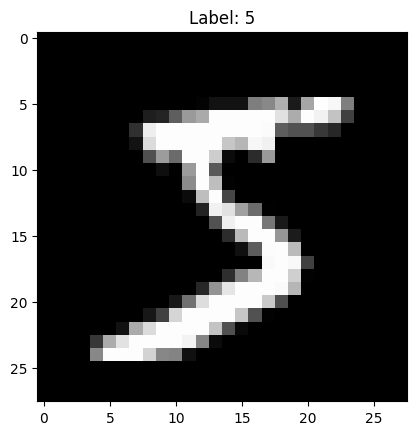

In [22]:
import matplotlib.pyplot as plt

plt.title(f"Label: {y[0]}")
plt.imshow(x.squeeze()[0], cmap="gray")

plt.show()

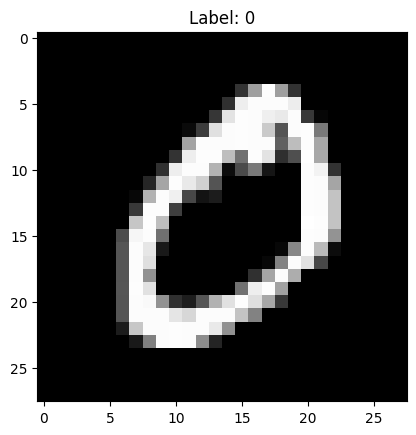

In [23]:
plt.title(f"Label: {y[1]}")
plt.imshow(x.squeeze()[1], cmap="gray")

plt.show()

# Statistics

In [26]:
X_train = train_ds.data.float()

X_train.shape

torch.Size([60000, 28, 28])

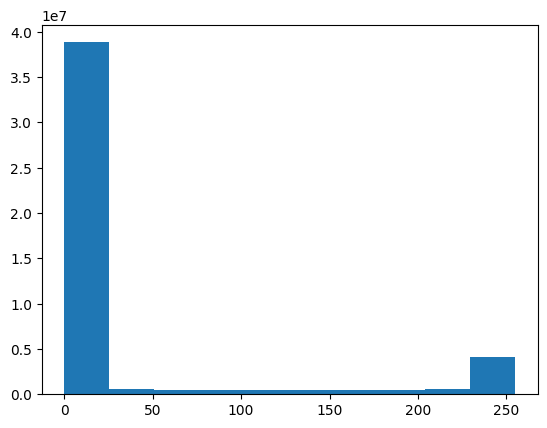

In [27]:
from matplotlib import pyplot as plt

plt.hist(X_train.flatten())

plt.show()

In [28]:
min = X_train.min().item()
max = X_train.max().item()

min, max

(0.0, 255.0)

In [29]:
mean = X_train.mean().item()

std = X_train.std().item()

mean, std

(33.31842041015625, 78.56748962402344)